In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 타임스탬프가 아닌 4개 토너먼트의 프로데이터셋 
pro_data_0 = pd.read_csv('../dataset/pro_data2.csv')
pro_data_1 = pd.read_csv('../dataset/pro_data_as-pcs1kr.csv')
pro_data_2 = pd.read_csv('../dataset/pro_data_as-pcs2kr.csv')
pro_data_3 = pd.read_csv('../dataset/pro_data_as-pcs3kr.csv')

# 이상치 제거
outlier = ['618291a3-d2a6-4b33-be8a-0bcd96e7760a', '3bb55936-e760-45eb-a18d-3e8f50908f8b', 'f566ed1a-9187-4937-a435-3b31ed881f2d']
pro_data_0 = pro_data_0[~pro_data_0['match_id'].isin(outlier[:2])]
pro_data_1 = pro_data_1[~pro_data_1['match_id'].isin(outlier[2:])]

# 전체 토너먼트의 프로데이터셋
total_pro_data = pd.concat([pro_data_0, pro_data_1, pro_data_2, pro_data_3], axis=0)

# map1 = pd.read_csv('../dataset/Baltic_kill_clustered_rank.csv')
# map2 = pd.read_csv('../dataset/Desert_kill_clustered_rank.csv')

# cnt_map2_10 = pd.read_csv('../dataset/move_miramar_10.csv')
# cnt_map2_10.rename(columns={'player_name': 'player_id'}, inplace=True)

# Z_map1 = pd.read_csv('../dataset/move_erangel4.csv')
# Z_map1.rename(columns={'player_name': 'player_id'}, inplace=True)

# 앞뒤 자기장은 자르고 매칭과 선수별로 해당 위치에 머무른 시간을 10초 단위로 count한 데이터셋 (에란겔 맵, 10m로 비닝)
cnt_map1_10 = pd.read_csv('../dataset/move_erangel_count.csv')
cnt_map1_10.rename(columns={'player_name': 'player_id'}, inplace=True)

In [5]:
# 매칭과 선수별로 해당 위치에 머무른 시간을 합쳐서 컬럼 추가 (에란겔 맵)
cnt_map1_10_sum = cnt_map1_10.groupby(['match_id', 'player_id'])['count'].sum().reset_index(name='count_sum')
print(cnt_map1_10_sum)

# # 매칭과 선수별로 해당 위치에 머무른 시간을 합쳐서 컬럼 추가 (미라마 맵)
# cnt_map2_10_sum = cnt_map2_10.groupby(['match_id', 'player_id'])['count'].sum().reset_index(name='count_sum')
# print(cnt_map2_10_sum)

                                  match_id    player_id  count_sum
0     00d05c35-8b9e-4207-bbc4-4f4d29bf1e7e     DNW_DG98          0
1     00d05c35-8b9e-4207-bbc4-4f4d29bf1e7e     DNW_EEND          1
2     00d05c35-8b9e-4207-bbc4-4f4d29bf1e7e    DNW_Raeng          0
3     00d05c35-8b9e-4207-bbc4-4f4d29bf1e7e     DWG_CRIS          4
4     00d05c35-8b9e-4207-bbc4-4f4d29bf1e7e     DWG_Corn         31
...                                    ...          ...        ...
3519  fd356f2d-57c1-482c-ba87-b2fc41c877b6     VSG_Hulk          9
3520  fd356f2d-57c1-482c-ba87-b2fc41c877b6  VSG_Menteul         14
3521  fd356f2d-57c1-482c-ba87-b2fc41c877b6   VSG_WICK2D         27
3522  fd356f2d-57c1-482c-ba87-b2fc41c877b6    WCS_Hanya          1
3523  fd356f2d-57c1-482c-ba87-b2fc41c877b6      WCS_JUN          0

[3524 rows x 3 columns]
                                  match_id    player_id  count_sum
0     008f28b2-8b0b-4979-8ee8-db6489a58f5d        AF_EJ         70
1     008f28b2-8b0b-4979-8ee8-db6489a

In [8]:
# 'match_id'와 'player_id'를 기준으로 total_pro_data의 'kill_place', 'team_rank' 컬럼을 추가
cnt_map1_10_sum = cnt_map1_10_sum.merge(total_pro_data[['match_id', 'player_id', 'kill_place', 'team_rank']],
                                        on=['match_id', 'player_id'],
                                        how='left')
# Z_map1_sum['log_check_z_sum'] = np.log(Z_map1_sum['check_z_sum'] + 1)  # 로그 변환
# move_mean = cnt_map1_10_sum.groupby(['team_rank'])['count_sum'].mean().reset_index()  # count 평균

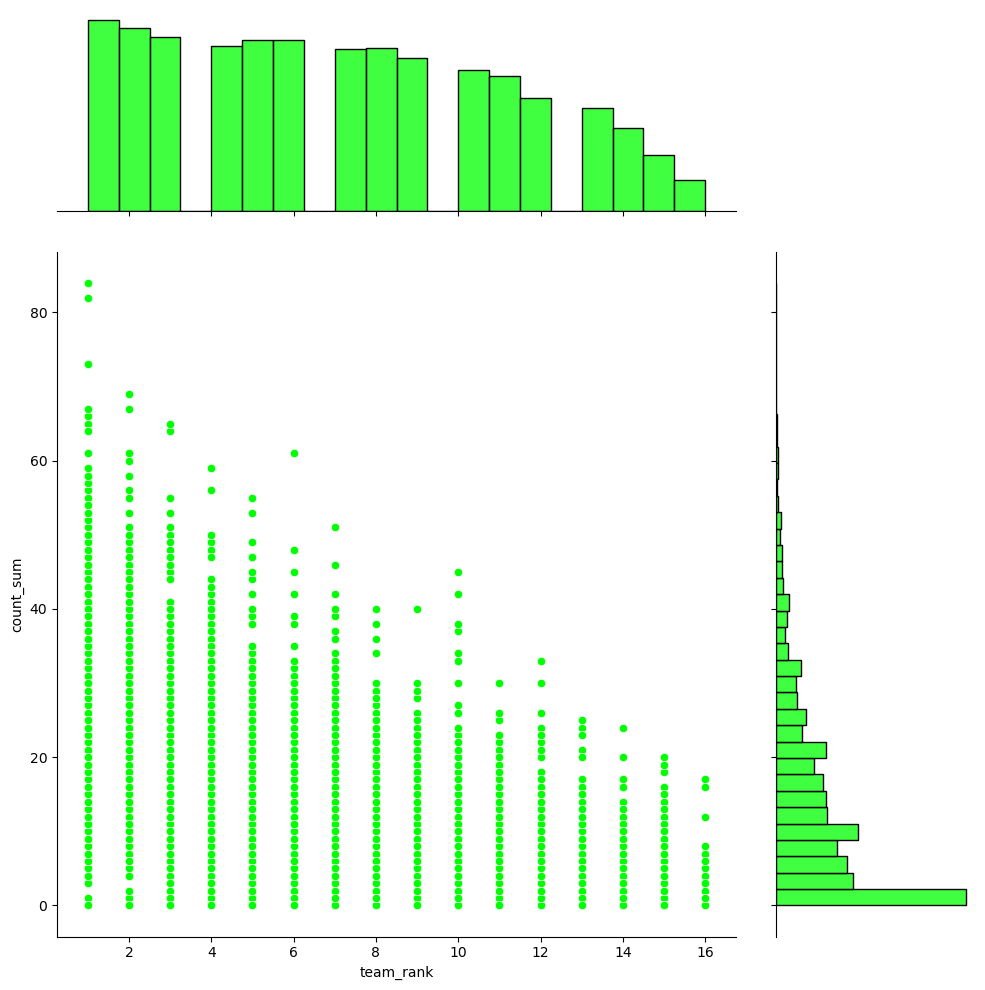

In [9]:
sns.jointplot(x='team_rank', y='count_sum', data=cnt_map1_10_sum, height=10, ratio=3, color="lime")  # 히스토그램, 산포도 시각화
plt.show()